# Before you start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [2]:
# pip install matplotlib

In [3]:
# pip install seaborn

In [103]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import RobustScaler

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../data/website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for more exploration. Make sure to comment what you find!

In [3]:
# Your code here
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [4]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

In [5]:
websites['Type'].value_counts()

Type
0    1565
1     216
Name: count, dtype: int64

In [6]:
websites[websites['Type']==0]

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0
5,B0_2064,18,7,UTF-8,nginx,NaN,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,...,6,9,894,11,13,838,894,11,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,B0_2099,169,25,utf-8,cloudflare-nginx,NaN,BS,New Providence,20/12/2008 0:00,11/12/2015 0:00,...,3,4,552,6,9,564,552,6,0.0,0
1774,B0_156,183,29,ISO-8859-1,Microsoft-IIS/7.5; litigation_essentials.lexis...,4890.0,US,NY,26/06/1997 0:00,18/11/2014 0:00,...,2,7,2062,30,26,8161,2742,30,8.0,0
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),8904.0,US,FL,15/02/1999 0:00,15/07/2015 0:00,...,2,6,6631,87,89,132181,6945,87,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,NaN,US,CA,1/04/1998 0:00,9/12/2016 0:00,...,0,0,0,0,0,0,0,0,0.0,0


In [7]:
websites[websites['Type']==1]

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
8,M2_17,20,5,utf-8,nginx/1.10.1,NaN,NaN,NaN,8/11/2014 7:41,NaN,...,0,0,0,2,3,213,146,2,2.0,1
9,M3_75,20,5,utf-8,nginx/1.10.1,NaN,NaN,NaN,8/11/2014 7:41,NaN,...,0,0,0,2,1,62,146,2,2.0,1
15,M0_71,21,7,ISO-8859-1,Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_b...,957.0,UK,NaN,16/07/2000 0:00,4/07/2015 0:00,...,0,1,717,11,10,1960,1011,11,4.0,1
16,M0_97,21,7,iso-8859-1,nginx,686.0,RU,Novosibirskaya obl.,25/05/2013 0:00,23/05/2016 0:00,...,0,2,603,8,9,1580,745,8,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1772,M4_61,173,34,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,1,1,90,1,5,416,90,1,0.0,1
1773,M4_39,178,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
1775,M4_45,194,17,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1
1776,M4_48,194,16,UTF-8,Apache,NaN,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,...,0,0,0,0,3,186,0,0,0.0,1


In [8]:
websites['URL'].unique()

array(['M0_109', 'B0_2314', 'B0_911', ..., 'B0_162', 'B0_1152', 'B0_676'],
      dtype=object)

In [9]:
websites.describe()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
count,1781.000000,1781.000000,969.000000,1781.000000,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1.781000e+03,1781.000000,1780.000000,1781.000000
mean,56.961258,11.111735,11726.927761,16.261089,5.472768,3.060640,2.982339e+03,18.540146,18.746210,1.589255e+04,3.155599e+03,18.540146,2.263483,0.121280
std,27.555586,4.549896,36391.809051,40.500975,21.807327,3.386975,5.605057e+04,41.627173,46.397969,6.986193e+04,5.605378e+04,41.627173,2.930853,0.326544
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.720000e+02,8.000000,9.000000,5.790000e+02,7.350000e+02,8.000000,0.000000,0.000000
75%,68.000000,13.000000,11323.000000,22.000000,5.000000,5.000000,2.328000e+03,26.000000,25.000000,9.806000e+03,2.701000e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1198.000000,1284.000000,2.060012e+06,2.362906e+06,1198.000000,20.000000,1.000000


In [10]:
websites.isna().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [11]:
# Your comment here
# websites contiene un total de 1.781 entradas divididas en 21 columns
# encontramos muchos nulos en distintas columnas
# Previsiblemente la columa 'Type' será el target donde 0 será web benigna y 1 maliciosa quizá 

#### Next, evaluate if the columns in this dataset are strongly correlated.

In class, we discussed that we are concerned if our dataset has strongly correlated columns because if this is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [12]:
# Your code here
num_cols = websites.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32", "float64"])
num_cols.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,263.0,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,15087.0,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,324.0,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,162.0,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,124140.0,57,2,5,4278,61,62,129889,4586,61,4.0,0


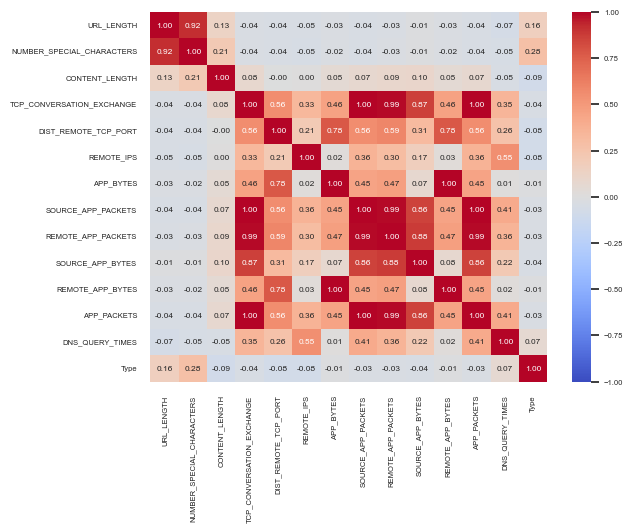

In [13]:
sns.set(font_scale=0.5)

sns.heatmap(num_cols.corr(), vmin=-1, vmax=+1, annot=True, cmap="coolwarm", fmt='.2f')
plt.show()

In [ ]:
# Qué se elimina: Valores PRÓXIMOS A CERO en la columna target

In [6]:
# Your comment here
'''
# Columnas que tienen una correlación de 0 en relación al target:
- APP_Bytes
- Source_app_packets
- Remote_app_packets
- Remote_app_bytes

'''

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [14]:
# Your code here
websites = websites.drop ('APP_BYTES', axis = 1)
websites = websites.drop ('REMOTE_APP_PACKETS', axis = 1)
websites = websites.drop ('SOURCE_APP_PACKETS', axis = 1)
websites = websites.drop ('REMOTE_APP_BYTES', axis = 1)

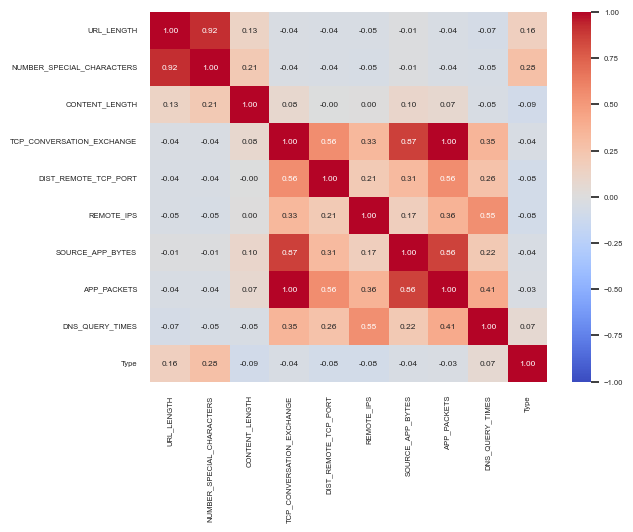

In [15]:
num_cols = websites.select_dtypes(include = ["int16", "int32", "int64", "float16", "float32", "float64"])

sns.set(font_scale=0.5)

sns.heatmap(num_cols.corr(), vmin=-1, vmax=+1, annot=True, cmap="coolwarm", fmt='.2f')
plt.show()

In [8]:
# Your comment here
''' Eliminé las columnas:

- APP_Bytes
- Source_app_packets
- Remote_app_packets
- Remote_app_bytes

'''

In [16]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  SOURCE_APP_BYTES           1781 non-null   int64

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [17]:
websites.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
SOURCE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [18]:
def missing_percentage(df):
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    missing_values_df = pd.DataFrame({'column_name': df.columns,'percent_missing': percent_missing})
    return missing_values_df.reset_index(drop=True)

In [19]:
# missing values percentage

missing_percentage(websites)

,column_name,percent_missing
0,URL,0.00
1,URL_LENGTH,0.00
2,NUMBER_SPECIAL_CHARACTERS,0.00
3,CHARSET,0.39
4,SERVER,9.88
5,CONTENT_LENGTH,45.59
6,WHOIS_COUNTRY,17.18
7,WHOIS_STATEPRO,20.33
8,WHOIS_REGDATE,7.13
9,WHOIS_UPDATED_DATE,7.80


In [20]:
# Your code here
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,7,0,2,1153,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,17,7,4,1265,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,18784,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,129889,61,4.0,0


If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [21]:
# Your code here
websites = websites.drop ('CONTENT_LENGTH', axis = 1)

In [22]:
# Your comment here
# Con todo el dolor, elimino la columna de content lenght

In [23]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   WHOIS_COUNTRY              1475 non-null   object 
 6   WHOIS_STATEPRO             1419 non-null   object 
 7   WHOIS_REGDATE              1654 non-null   object 
 8   WHOIS_UPDATED_DATE         1642 non-null   object 
 9   TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 10  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 11  REMOTE_IPS                 1781 non-null   int64  
 12  SOURCE_APP_BYTES           1781 non-null   int64  
 13  APP_PACKETS                1781 non-null   int64

In [24]:
websites = websites.dropna()

In [25]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 3 to 1780
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1257 non-null   object 
 1   URL_LENGTH                 1257 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1257 non-null   int64  
 3   CHARSET                    1257 non-null   object 
 4   SERVER                     1257 non-null   object 
 5   WHOIS_COUNTRY              1257 non-null   object 
 6   WHOIS_STATEPRO             1257 non-null   object 
 7   WHOIS_REGDATE              1257 non-null   object 
 8   WHOIS_UPDATED_DATE         1257 non-null   object 
 9   TCP_CONVERSATION_EXCHANGE  1257 non-null   int64  
 10  DIST_REMOTE_TCP_PORT       1257 non-null   int64  
 11  REMOTE_IPS                 1257 non-null   int64  
 12  SOURCE_APP_BYTES           1257 non-null   int64  
 13  APP_PACKETS                1257 non-null   int64  
 1

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [26]:
# Examine missing values in each column
missing_percentage(websites)

,column_name,percent_missing
0,URL,0.0
1,URL_LENGTH,0.0
2,NUMBER_SPECIAL_CHARACTERS,0.0
3,CHARSET,0.0
4,SERVER,0.0
5,WHOIS_COUNTRY,0.0
6,WHOIS_STATEPRO,0.0
7,WHOIS_REGDATE,0.0
8,WHOIS_UPDATED_DATE,0.0
9,TCP_CONVERSATION_EXCHANGE,0.0


# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [27]:
websites['WHOIS_COUNTRY'].unique()

array(['US', 'SC', 'RU', 'AU', 'CA', 'PA', 'IN', 'GB', "[u'GB'; u'UK']",
       'NL', 'UG', 'JP', 'CN', 'UK', 'SI', 'ru', 'KY', 'AT', 'CZ', 'PH',
       'LV', 'TR', 'ES', 'us', 'HK', 'UA', 'CH', 'BS', 'PK', 'IL', 'DE',
       'SE', 'IT', 'NO', 'BE', 'BY', 'AE', 'IE', 'UY', 'KG'], dtype=object)

In [28]:
websites[websites['WHOIS_COUNTRY']=='Cyprus']  # No hay valores

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type


In [31]:
websites[websites['WHOIS_COUNTRY']=='se']  # No hay valores

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type


In [29]:
# Your code here
websites[websites['WHOIS_COUNTRY']=='us']     # Hay 3 valores us

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
628,M0_9,43,10,ISO-8859-1,DOSarrest,us,Washington,23/06/2003 0:00,2/01/2017 0:00,8,0,1,2806,10,2.0,1
1397,B0_828,71,11,us-ascii,Microsoft-IIS/7.5,us,CA,17/11/2006 0:00,31/03/2016 0:00,0,0,0,0,0,0.0,0
1695,B0_877,112,19,ISO-8859-1,nginx,us,California,10/09/1998 0:00,17/02/2016 0:00,0,0,0,0,0,0.0,0


In [30]:
websites[websites['WHOIS_COUNTRY']=="[u'GB'; u'UK']"]   # Hay 5 valores [u'GB'; u'UK']

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
104,B0_1020,28,8,utf-8,nginx,[u'GB'; u'UK'],UK,2002-03-20T23:59:59.0Z,2017-03-07T22:02:38.0Z,0,0,0,0,0,0.0,0
290,B0_2026,35,9,utf-8,nginx,[u'GB'; u'UK'],UK,2002-03-20T23:59:59.0Z,2017-03-07T22:02:38.0Z,4,3,2,244,4,0.0,0
357,B0_2093,37,9,utf-8,nginx,[u'GB'; u'UK'],UK,2002-03-20T23:59:59.0Z,2017-03-07T22:02:38.0Z,11,10,7,882,11,0.0,0
383,B0_1224,38,8,utf-8,nginx,[u'GB'; u'UK'],UK,2002-03-20T23:59:59.0Z,2017-03-07T22:02:38.0Z,0,0,0,0,0,0.0,0
1400,B0_1164,72,14,utf-8,nginx,[u'GB'; u'UK'],UK,2002-03-20T23:59:59.0Z,2017-03-07T22:02:38.0Z,0,0,0,0,0,0.0,0


In [32]:
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].replace(['us'], ['US']).replace(["[u'GB'; u'UK']"], ['GB'])

In [33]:
websites[websites['WHOIS_COUNTRY']=='us']

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type


In [34]:
websites[websites['WHOIS_COUNTRY']=="[u'GB'; u'UK']"]

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type


Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [35]:
# Your code here
websites['WHOIS_COUNTRY'].value_counts()

WHOIS_COUNTRY
US    960
CA     75
ES     63
AU     26
PA     21
GB     18
JP     10
CZ      8
CN      8
IN      8
NL      5
CH      5
BS      4
ru      4
AT      4
UK      4
KY      3
PH      3
SC      3
HK      2
UY      2
UA      2
KG      2
SI      2
RU      2
TR      1
UG      1
PK      1
IL      1
DE      1
SE      1
IT      1
NO      1
BE      1
BY      1
AE      1
IE      1
LV      1
Name: count, dtype: int64

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [36]:
top_countries = websites['WHOIS_COUNTRY'].value_counts().head(10).index.tolist() # Haces una lista con los TOP10

In [37]:
top_countries

['US', 'CA', 'ES', 'AU', 'PA', 'GB', 'JP', 'CZ', 'CN', 'IN']

In [38]:
websites['WHOIS_COUNTRY'] = websites['WHOIS_COUNTRY'].apply(lambda x: x if x in top_countries else 'OTHER')
# Aplicas una lamba donde si x de esa columna está entre la lista de TOP10 pues nada, sino 'OTHER'

In [39]:
websites['WHOIS_COUNTRY'].value_counts()

WHOIS_COUNTRY
US       960
CA        75
ES        63
OTHER     60
AU        26
PA        21
GB        18
JP        10
IN         8
CN         8
CZ         8
Name: count, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [40]:
# Your code here
websites = websites.drop('WHOIS_STATEPRO', axis = 1).drop('WHOIS_REGDATE', axis = 1).drop('WHOIS_UPDATED_DATE', axis = 1)

In [41]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 3 to 1780
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1257 non-null   object 
 1   URL_LENGTH                 1257 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1257 non-null   int64  
 3   CHARSET                    1257 non-null   object 
 4   SERVER                     1257 non-null   object 
 5   WHOIS_COUNTRY              1257 non-null   object 
 6   TCP_CONVERSATION_EXCHANGE  1257 non-null   int64  
 7   DIST_REMOTE_TCP_PORT       1257 non-null   int64  
 8   REMOTE_IPS                 1257 non-null   int64  
 9   SOURCE_APP_BYTES           1257 non-null   int64  
 10  APP_PACKETS                1257 non-null   int64  
 11  DNS_QUERY_TIMES            1257 non-null   float64
 12  Type                       1257 non-null   int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 137.

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [42]:
# Your code here
websites.select_dtypes(include='object')   # Todo correcto

,URL,CHARSET,SERVER,WHOIS_COUNTRY
3,B0_113,ISO-8859-1,nginx,US
5,B0_2064,UTF-8,nginx,OTHER
6,B0_462,iso-8859-1,Apache/2,US
7,B0_1128,us-ascii,Microsoft-HTTPAPI/2.0,US
10,B0_1013,utf-8,Apache,US
...,...,...,...,...
1776,M4_48,UTF-8,Apache,ES
1777,M4_41,UTF-8,Apache,ES
1778,B0_162,utf-8,Apache/2.2.16 (Debian),US
1779,B0_1152,ISO-8859-1,cloudflare-nginx,US


#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [43]:
# Your code here
websites = websites.drop('URL', axis = 1)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [44]:
# Your code here
websites['CHARSET'].value_counts()

CHARSET
UTF-8           520
utf-8           279
ISO-8859-1      275
us-ascii         98
iso-8859-1       83
windows-1251      1
windows-1252      1
Name: count, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [45]:
# Your code here
websites['SERVER'].value_counts()
websites['SERVER'].unique()

array(['nginx', 'Apache/2', 'Microsoft-HTTPAPI/2.0', 'Apache',
       'openresty/1.11.2.1', 'Apache/2.4.7 (Ubuntu)', 'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'cloudflare-nginx', 'Apache/2.2.22', 'nginx/1.8.0',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Apache/2.2.22 (Debian)', 'Apache/2.2.15 (CentOS)',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Pepyaka/1.11.3', 'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips',
       'Apache/2.2.22 (Ubuntu)', 'Apache/2.4.25', 'Tengine',
       'Apache/2.4.18 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.6 (CentOS) PHP/5.6.8', 'AmazonS3',
       'Apache/1.3.37 (Unix) mod_perl/1.29 mod_ssl/2.8.28 OpenSSL/0.9.7e-p1',
       'ATS', 'CherryPy/3.6.0', 'Apache/2.2.15 (Red Hat)', 'Server',
       'Apache/2.4.6 (C

![Think Hard](../images/think-hard.jpg)

In [46]:
# Your comment here
# Propuesta: agruparlos bajo la misma categorización de Apache, Microsoft, ngnix, 

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [47]:
# Your code here
def clean_server(df): 
    if 'Apache' in df: 
        return 'Apache'
    elif 'nginx' in df:
        return 'ngnix'
    elif 'Microsoft' in df:
        return 'Microsoft'
    else:
        return 'Other'

In [48]:
websites['SERVER'] = websites['SERVER'].apply(clean_server)

In [49]:
websites['SERVER']

3           ngnix
5           ngnix
6          Apache
7       Microsoft
10         Apache
          ...    
1776       Apache
1777       Apache
1778       Apache
1779        ngnix
1780    Microsoft
Name: SERVER, Length: 1257, dtype: object

In [50]:
# Count `SERVER` value counts here
websites['SERVER'].value_counts()

SERVER
Apache       491
ngnix        322
Other        300
Microsoft    144
Name: count, dtype: int64

In [51]:
websites.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 3 to 1780
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 1257 non-null   int64  
 1   NUMBER_SPECIAL_CHARACTERS  1257 non-null   int64  
 2   CHARSET                    1257 non-null   object 
 3   SERVER                     1257 non-null   object 
 4   WHOIS_COUNTRY              1257 non-null   object 
 5   TCP_CONVERSATION_EXCHANGE  1257 non-null   int64  
 6   DIST_REMOTE_TCP_PORT       1257 non-null   int64  
 7   REMOTE_IPS                 1257 non-null   int64  
 8   SOURCE_APP_BYTES           1257 non-null   int64  
 9   APP_PACKETS                1257 non-null   int64  
 10  DNS_QUERY_TIMES            1257 non-null   float64
 11  Type                       1257 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 127.7+ KB


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [52]:
# Your code here
website_dummy = pd.get_dummies(websites, drop_first=True, dtype=float)  

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [53]:
# Your code here
website_dummy

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,SOURCE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,CHARSET_UTF-8,...,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_CN,WHOIS_COUNTRY_CZ,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_US
3,17,6,31,22,3,18784,39,8.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,18,7,11,6,9,838,11,0.0,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,18,6,12,0,3,8559,14,2.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,19,6,0,0,0,0,0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10,20,6,0,0,0,0,0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,0,0,0,186,0,0.0,1,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1777,198,17,0,0,0,124,0,0.0,1,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1778,201,34,83,2,6,132181,87,4.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1779,234,34,0,0,0,0,0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [54]:
website_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1257 entries, 3 to 1780
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL_LENGTH                 1257 non-null   int64  
 1   NUMBER_SPECIAL_CHARACTERS  1257 non-null   int64  
 2   TCP_CONVERSATION_EXCHANGE  1257 non-null   int64  
 3   DIST_REMOTE_TCP_PORT       1257 non-null   int64  
 4   REMOTE_IPS                 1257 non-null   int64  
 5   SOURCE_APP_BYTES           1257 non-null   int64  
 6   APP_PACKETS                1257 non-null   int64  
 7   DNS_QUERY_TIMES            1257 non-null   float64
 8   Type                       1257 non-null   int64  
 9   CHARSET_UTF-8              1257 non-null   float64
 10  CHARSET_iso-8859-1         1257 non-null   float64
 11  CHARSET_us-ascii           1257 non-null   float64
 12  CHARSET_utf-8              1257 non-null   float64
 13  CHARSET_windows-1251       1257 non-null   float64
 1

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [56]:
X = website_dummy.drop('Type', axis=1)
type(X)

pandas.core.frame.DataFrame

In [57]:
y = website_dummy['Type']
type(y)

pandas.core.series.Series

In [58]:
# Your code here:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")


X_train: (1005, 27), X_test: (252, 27), y_train: (1005,), y_test: (252,)


#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [63]:
# Your code here:

modelo = LogisticRegression()


Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [64]:
# Your code here:

modelo.fit(X_train, y_train)

C:\Users\tete1\miniconda3\envs\jupyter_env\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
y_pred = modelo.predict(X_test)

print(type(y_pred))
print(y_pred)

<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


In [77]:
check = pd.DataFrame({'Ground truth':y_test, 'Predictions':y_pred, 'Diff':y_test-y_pred})
check

,Ground truth,Predictions,Diff
646,0,0,0
160,0,0,0
91,0,0,0
104,0,0,0
1554,0,0,0
...,...,...,...
246,1,1,0
713,0,0,0
595,0,0,0
388,0,0,0


finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [82]:
# Confusion matrix
matriz = confusion_matrix(y_test, y_pred)
matriz


# 222 datos eran TP  y el modelo los predijo como tal
# 7 datos eran TN y el modelo los predijo como tal
# 2 predicciones son FN (eran 1 y predijo 0)
# 21 predcciones son FP (eran 0 y predijo 1)

array([[222,   2],
       [ 21,   7]], dtype=int64)

In [85]:
# Accuracy 

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy de prediciones: ", accuracy)

Accuracy de prediciones:  0.9087301587301587


In [84]:
# Extra: NO está en el lab pero quiero probar > precision_score

precision = precision_score(y_test, y_pred)
print("Precisión del modelo: ", precision)

Precisión del modelo:  0.7777777777777778


What are your thoughts on the performance of the model? Write your conclusions below.

In [33]:
# Your conclusions here:

'''
En realidad donde más se equivoca el modelo es en Falsos Positivos, es decir, en casos donde es 0 y él predice 1. 
En el caso de que 0 sea benigno y 1 sea problema de ciberseguridad, no me parece mal ya que pinta como un modelo seguro.
Sin embargo, me raya que tenga una exactitud del 0.91 pero luego la precisión sea del 0.77.'''

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [87]:
# Your code here:

neigh = KNeighborsClassifier(n_neighbors=3)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [88]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [95]:
neigh_pred = neigh.predict(X_test)

print(type(neigh_pred))
print(neigh_pred)

<class 'numpy.ndarray'>
[0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [90]:
# Confusion matrix
neigh_matriz = confusion_matrix(y_test, neigh_pred)
neigh_matriz


# 222 datos eran TP  y el modelo los predijo como tal >> Igual que en LR
# 17 datos eran TN y el modelo los predijo como tal >> En LR tenía 7 datos eran TN y el modelo los predijo como tal
# 2 predicciones son FN (eran 1 y predijo 0)  >> Igual que en LR
# 11 predicciones son FP (eran 0 y predijo 1 >> En LR tenía 21 predcciones son FP (eran 0 y predijo 1)

array([[222,   2],
       [ 11,  17]], dtype=int64)

In [91]:
# Accuracy 

accuracy_neigh = accuracy_score(y_test, neigh_pred)
print("Accuracy de prediciones: ", accuracy_neigh)

Accuracy de prediciones:  0.9484126984126984


In [92]:
# Extra: NO está en el lab pero quiero probar > precision_score

precision_neigh = precision_score(y_test, neigh_pred)
print("Precisión del modelo: ", precision_neigh)

Precisión del modelo:  0.8947368421052632


In [35]:
# Documentación KNeighbor: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [93]:
# Your code here:

neigh_five = KNeighborsClassifier(n_neighbors=5)

In [94]:
neigh_five.fit(X_train, y_train)

KNeighborsClassifier()

In [96]:
neigh_five_pred = neigh_five.predict(X_test)

print(type(neigh_five_pred))
print(neigh_five_pred)

<class 'numpy.ndarray'>
[0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [97]:
# Confusion matrix
neigh_five_matriz = confusion_matrix(y_test, neigh_five_pred)
neigh_five_matriz

array([[223,   1],
       [ 12,  16]], dtype=int64)

In [99]:
# Accuracy 

accuracy_five_neigh = accuracy_score(y_test, neigh_five_pred)
print("Accuracy de prediciones: ", accuracy_five_neigh)
print("Accuracy de prediciones: ", accuracy_neigh)

# Es el mismo que el anterior

Accuracy de prediciones:  0.9484126984126984
Accuracy de prediciones:  0.9484126984126984


In [101]:
# Extra: NO está en el lab pero quiero probar > precision_score

precision_five_neigh = precision_score(y_test, neigh_five_pred)
print("Precisión del modelo: ", precision_five_neigh)
print("Precisión del modelo: ", precision_neigh)

# Mayor precisión con 5 n_neighbors

Precisión del modelo:  0.9411764705882353
Precisión del modelo:  0.8947368421052632


Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [37]:
# Your conclusions here:

# En la matriz con k 5 incrementa +1 en cada True, TP y TN
# Pero disminuye -1 en cada False, FP y FN
# El accuracy es igual 
# Pero es más preciso si k=5

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [104]:
# Your code here
scaler = RobustScaler()

In [105]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [106]:
# LogisticRegression ya está en la variable modelo que no he sobreescrito

In [108]:
modelo.fit(X_train_scaled, y_train)

LogisticRegression()

In [109]:
y_pred_scaled = modelo.predict(X_test_scaled)

In [110]:
# Confusion matrix
matriz_scaled = confusion_matrix(y_test, y_pred_scaled)
matriz_scaled

array([[223,   1],
       [ 14,  14]], dtype=int64)

In [112]:
# Accuracy 

accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print("Accuracy de prediciones: ", accuracy_scaled)
print("Accuracy de prediciones: ", accuracy)

Accuracy de prediciones:  0.9404761904761905
Accuracy de prediciones:  0.9087301587301587


In [113]:
# Extra: NO está en el lab pero quiero probar > precision_score

precision_scaled = precision_score(y_test, y_pred_scaled)
print("Precisión del modelo: ", precision_scaled)
print("Precisión del modelo: ", precision)

Precisión del modelo:  0.9333333333333333
Precisión del modelo:  0.7777777777777778


In [ ]:
# Mejora muchísimo el modelo, al escalarlo reduce los FP y acierta más en TN
# Incrementa la exactitud pero sobre todo la precisión